# 🧠 Breast Cancer Classification using Neural Networks

This project focuses on binary classification of breast cancer tumors as **Malignant** or **Benign** using a **Multi-Layer Perceptron (MLP)** neural network (deep learning) built with **Keras / TensorFlow**.

The goal is to demonstrate an end-to-end **Data Science & Machine Learning workflow**, including preprocessing, model training, evaluation, and interpretation of results.

---

## 📊 Dataset
- **Source:** Breast Cancer Wisconsin (Diagnostic) Dataset
- **Provider:** `sklearn.datasets.load_breast_cancer`
- **Samples:** 569
- **Features:** 30 numerical features extracted from cell nuclei images
- **Target Classes:**
  - `0` → Malignant (cancerous)
  - `1` → Benign (non-cancerous)

---

## ⚙️ Methodology
1. Train-test split (70% / 30%) with stratification
2. Feature scaling using `StandardScaler`
3. Neural network model:
   - Dense layers with ReLU activation
   - Dropout for regularization
   - Sigmoid output for binary classification
4. Binary Cross-Entropy loss
5. Adam optimizer
6. Early Stopping to prevent overfitting

---

## 📈 Evaluation Metrics
- Accuracy
- ROC–AUC
- Confusion Matrix
- Precision, Recall, F1-score

---

## 🔁 Reproducibility
- Fixed random seed (`SEED = 42`)
- Deterministic train-test split

---

## 🧪 Tools & Libraries
- Python
- NumPy
- Scikit-learn
- TensorFlow / Keras
- Matplotlib

---

## 📌 Note
This project is intended for **educational and portfolio purposes** and does not replace professional medical diagnosis.


In [110]:
import keras
from sklearn.datasets import load_breast_cancer
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [79]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [94]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [97]:
print("Target names:", cancer.target_names)

Target names: ['malignant' 'benign']


In [99]:
print("First 10 label (num):", cancer.target[:10])
print("first 10 label (cat):", cancer.target_names[cancer.target[:10]])

First 10 label (num): [0 0 0 0 0 0 0 0 0 0]
first 10 label (cat): ['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant']


In [83]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=SEED, stratify=cancer.target)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

(398, 30) (171, 30) (398,) (171,)


In [104]:
model = Sequential()
model.add(Dense(15, input_dim=30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early], verbose=1)

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7095 - loss: 0.6434 - val_accuracy: 0.8625 - val_loss: 0.6008
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7980 - loss: 0.6000 - val_accuracy: 0.9125 - val_loss: 0.5388
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8630 - loss: 0.5437 - val_accuracy: 0.9125 - val_loss: 0.4727
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8862 - loss: 0.4757 - val_accuracy: 0.9250 - val_loss: 0.4043
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9020 - loss: 0.4185 - val_accuracy: 0.9375 - val_loss: 0.3390
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8735 - loss: 0.3809 - val_accuracy: 0.9500 - val_loss: 0.2827
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9052 - loss: 0.3126 - val_accuracy: 0.9750 - val_loss: 0.2353
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8989 - loss: 0.3124 - val_accuracy: 0.9750 - val_l

In [105]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
test_loss = loss
test_accuracy = accuracy
print('Loss: ', loss)
print('Accuracy: ', accuracy)

Loss:  0.06392065435647964
Accuracy:  0.9766082167625427


In [106]:
y_test_m = (y_test == 0).astype(int)
y_prob_m = 1 - y_prob

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_pred_m = (y_prob_m >= 0.5).astype(int)

print("AUC (malignant positive):", roc_auc_score(y_test_m, y_prob_m))
print(confusion_matrix(y_test_m, y_pred_m))
print(classification_report(y_test_m, y_pred_m))



AUC (malignant positive): 0.9972254672897196
[[104   3]
 [  1  63]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       107
           1       0.95      0.98      0.97        64

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



<Figure size 600x500 with 0 Axes>

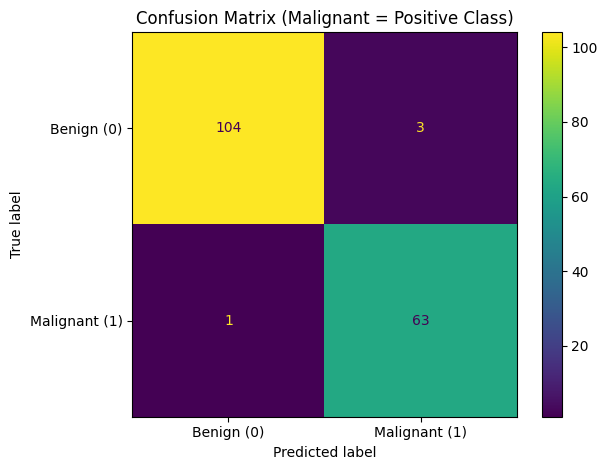

In [109]:


cm = confusion_matrix(y_test_m, y_pred_m)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Benign (0)", "Malignant (1)"]
)

plt.figure(figsize=(6, 5))
disp.plot(values_format="d")
plt.title("Confusion Matrix (Malignant = Positive Class)")
plt.tight_layout()

plt.savefig("confusion_matrix.png", dpi=200, bbox_inches="tight")
plt.show()
